# Lab 7 - Implement Ensemble Learning with AdaBoost Classifier

**Problem Statement:** Build and train an AdaBoost classifier where Decision Tree acts as the first base classifier. In particular, train an AdaBoost classifier based on 200 *Decision Stumps* on Moons Dataset using Scikit-Learn's AdaBoostClassifier class.

Compare the accuracy of the AdaBoostClassifier with the individual DecisionStump on the Test Set.

Finally draw the decision boundary of the AdaBoostClassifier.

(***Note:*** *A Decision Stump is a Decision Tree with max_depth = 1 - in other words, a tree composed of a single decision node plus two leaf nodes.*)




## Step 1: Loading the Moons Data and Splitting into Training and Testing Sets


In [ ]:
import sklearn
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Step 2: Building and Training the AdaBoost Classifier


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1), n_estimators=200,
        algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

## Step 3 : Comparing Performance of the AdaBoost Classifier with Individual Decision Stump on Test Set


In [ ]:
from sklearn.metrics import accuracy_score

# first, build and train an individual Decision Stump
ds_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
ds_clf.fit(X_train, y_train)

# second, compare the accuracy of the previously trained AdaBoost with the just trained DecisionStump
# on the test data
y_pred_ada_clf = ada_clf.predict(X_test)
y_pred_ds_clf = ds_clf.predict(X_test)

print(ds_clf.__class__.__name__, accuracy_score(y_test, y_pred_ds_clf))
print(ada_clf.__class__.__name__, accuracy_score(y_test, y_pred_ada_clf))



DecisionTreeClassifier 0.824
AdaBoostClassifier 0.896


## Step 4 : Visualizing the Decision Boundary of our AdaBoost Model
We define a function named *plot_decision_boundary* for the purpose and then invoke it passing our AdaBoost model and training data as arguments.

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

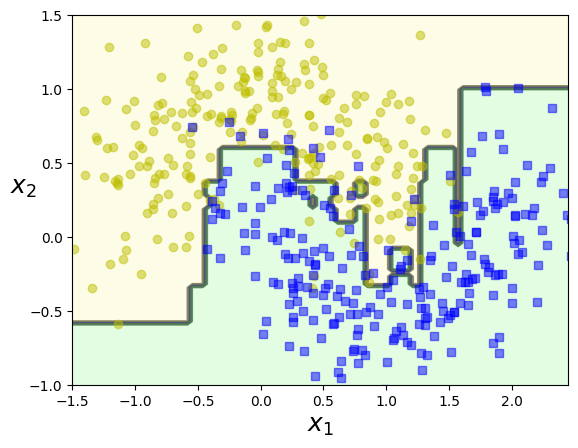

In [ ]:
plot_decision_boundary(ada_clf, X, y)